# Car Price Prediction


### Motive
   We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc. to meet certain price levels.
  
   I have selected the required used car prices dataset with the needed features and parameters from Kaggle. The required data is cleaned and pre-processed using machine learning techniques before applying any algorithm for predicting the price. Then after pre-processing and cleaning the data first need to apply train_test_split to keep the data in two parts for training and validation.


### Dataset description
   The dataset used for this project consists of the following columns:
    
   - Car_Name
   - Year
   - Selling_Price
   - Present_Price
   - Kms_Driven
   - Fuel_Type
   - Seller_Type
   - Transmission
   - Owner
    
### Steps

   - Import the needed libraries
   - Reading and understanding the data
   - Data Preprocessing
   - Finding Outlier
   - Exploratory Data Analysis 
   - Feature Engineering
   - Train_Test_Split
   - Feature encoding
   - Feature Selection
   - Model Training
   - Prediction

In [1]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib as jb

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

- Importing data using the pandas library
- Understanding the structure of the data

In [2]:
# using pandas dataframe to read the data
df=pd.read_csv('Data/Train/Raw/train.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Royal Enfield Classic 500,2009,0.90,1.75,40000,Petrol,Individual,Manual,0
1,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
2,xcent,2014,4.40,7.13,34000,Petrol,Dealer,Manual,0
3,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
4,dzire,2014,5.50,8.06,45000,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
205,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
206,innova,2015,12.50,13.46,38000,Diesel,Dealer,Manual,0
207,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
208,verna,2013,6.15,9.40,45000,Diesel,Dealer,Manual,0


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       210 non-null    object 
 1   Year           210 non-null    int64  
 2   Selling_Price  210 non-null    float64
 3   Present_Price  210 non-null    float64
 4   Kms_Driven     210 non-null    int64  
 5   Fuel_Type      210 non-null    object 
 6   Seller_Type    210 non-null    object 
 7   Transmission   210 non-null    object 
 8   Owner          210 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 14.9+ KB


In [5]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,210,210.00000,210.000000,210.000000,210.000000,210,210,210,210.000000
unique,80,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,18,NaN,NaN,NaN,NaN,165,137,180,NaN
mean,NaN,2013.60000,4.828857,7.942795,34616.880952,NaN,NaN,NaN,0.047619
std,NaN,2.96099,5.420704,9.518319,27778.841104,NaN,NaN,NaN,0.272537
min,NaN,2003.00000,0.100000,0.470000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.00000,1.050000,1.470000,14473.750000,NaN,NaN,NaN,0.000000
50%,NaN,2014.00000,3.500000,6.010000,30000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.00000,6.075000,9.930000,46875.000000,NaN,NaN,NaN,0.000000


In [6]:
df.shape

(210, 9)

In [7]:
df.nunique()

Car_Name          80
Year              15
Selling_Price    127
Present_Price    118
Kms_Driven       158
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
len(df['Car_Name'].unique())

# We have over 80 unique car names, so we will extract only the car brand from the car names

80

In [10]:
df["Brand_Name"]=df["Car_Name"].str.split(" ",expand=True)[0]

In [11]:
df["Brand_Name"].value_counts()

Brand_Name
Bajaj       19
city        18
Royal       14
corolla     11
Honda       11
fortuner    10
verna       10
etios        7
ciaz         7
Hero         7
i20          7
grand        7
brio         7
ertiga       6
TVS          6
Yamaha       6
innova       6
eon          5
alto         4
i10          4
swift        4
jazz         4
wagon        3
dzire        3
elantra      2
sx4          2
ritz         2
creta        2
xcent        2
amaze        2
KTM          2
800          1
Activa       1
Suzuki       1
omni         1
baleno       1
land         1
camry        1
UM           1
Mahindra     1
Hyosung      1
Name: count, dtype: int64

In [12]:
# we consider the "Brand_Name" instead of "Car_Name"

df.drop(['Car_Name'], axis = 1, inplace = True)

In [13]:
df["Year"].value_counts()

Year
2015    41
2016    33
2017    27
2013    27
2014    25
2012    17
2011    12
2010    10
2009     5
2006     4
2005     3
2003     2
2008     2
2004     1
2007     1
Name: count, dtype: int64

In [14]:
df['Age'] = 2023 - df['Year']

In [15]:
# we consider the "age" instead of "year"

df.drop(['Year'], axis = 1, inplace = True)

In [16]:
df.drop(['Owner'], axis = 1, inplace = True)

In [17]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Brand_Name,Age
0,0.90,1.75,40000,Petrol,Individual,Manual,Royal,14
1,0.48,0.51,4300,Petrol,Individual,Automatic,Honda,6
2,4.40,7.13,34000,Petrol,Dealer,Manual,xcent,9
3,0.35,2.28,127000,Petrol,Individual,Manual,800,20
4,5.50,8.06,45000,Diesel,Dealer,Manual,dzire,9
...,...,...,...,...,...,...,...,...
205,1.35,3.45,16500,Petrol,Individual,Manual,Hyosung,9
206,12.50,13.46,38000,Diesel,Dealer,Manual,innova,8
207,7.75,10.79,43000,Diesel,Dealer,Manual,ertiga,7
208,6.15,9.40,45000,Diesel,Dealer,Manual,verna,10


In [18]:
df['Kms_Driven'].describe().round()

count       210.0
mean      34617.0
std       27779.0
min         500.0
25%       14474.0
50%       30000.0
75%       46875.0
max      197176.0
Name: Kms_Driven, dtype: float64

## Finding Outlier

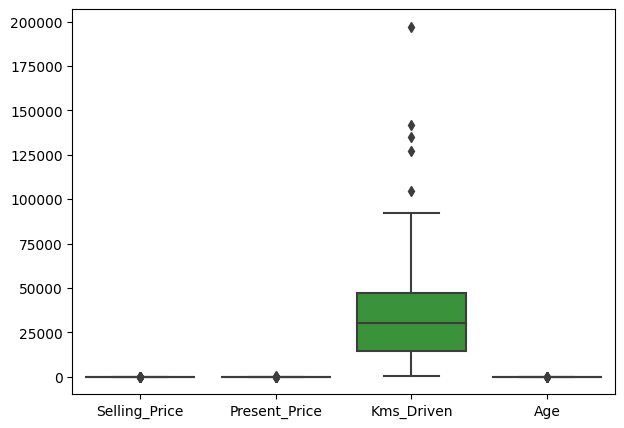

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(df)
plt.show()

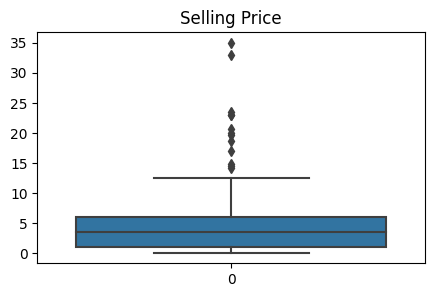

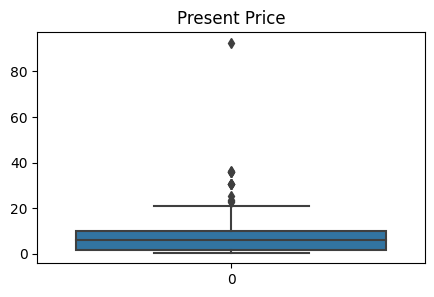

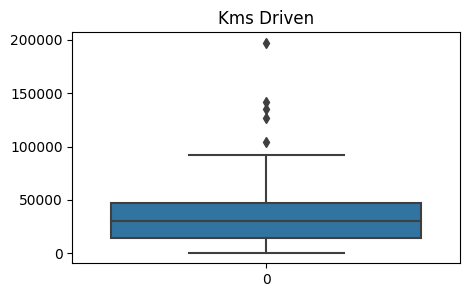

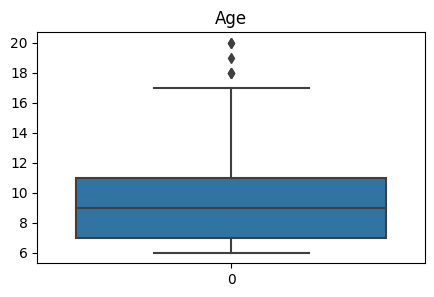

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Selling_Price'])
plt.title('Selling Price')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(df['Present_Price'])
plt.title('Present Price')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(df['Kms_Driven'])
plt.title('Kms Driven')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(df['Age'])
plt.title('Age')
plt.show()

In [21]:
#handling outlier in Selling_Price

q1=df['Selling_Price'].quantile(0.25)
q3=df['Selling_Price'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Selling_Price']=np.where(df['Selling_Price']<lower_range,lower_range,
                    np.where(df['Selling_Price']>upper_range,upper_range,df['Selling_Price']))
df['Selling_Price']


0       0.90
1       0.48
2       4.40
3       0.35
4       5.50
       ...  
205     1.35
206    11.10
207     7.75
208     6.15
209     7.05
Name: Selling_Price, Length: 210, dtype: float64

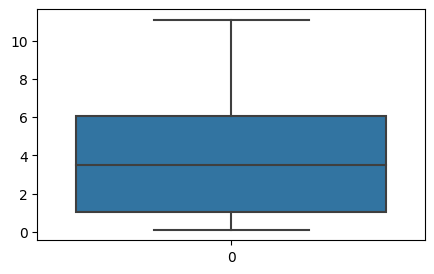

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Selling_Price'])
plt.show()

In [23]:
#handling outlier in Present_Price

q1=df['Present_Price'].quantile(0.25)
q3=df['Present_Price'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Present_Price']=np.where(df['Present_Price']<lower_range,lower_range,
                    np.where(df['Present_Price']>upper_range,upper_range,df['Present_Price']))
df['Present_Price']

0       1.75
1       0.51
2       7.13
3       2.28
4       8.06
       ...  
205     3.45
206    13.46
207    10.79
208     9.40
209    18.39
Name: Present_Price, Length: 210, dtype: float64

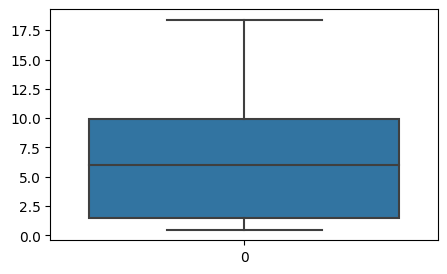

In [24]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Present_Price'])
plt.show()

In [25]:
#handling outlier in Kms_Driven

q1=df['Kms_Driven'].quantile(0.25)
q3=df['Kms_Driven'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Kms_Driven']=np.where(df['Kms_Driven']<lower_range,lower_range,
                    np.where(df['Kms_Driven']>upper_range,upper_range,df['Kms_Driven']))
df['Kms_Driven']

0      40000.00
1       4300.00
2      34000.00
3      79276.25
4      45000.00
         ...   
205    16500.00
206    38000.00
207    43000.00
208    45000.00
209    45000.00
Name: Kms_Driven, Length: 210, dtype: float64

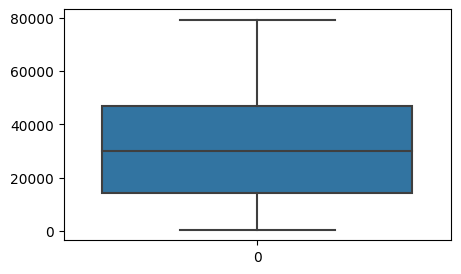

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Kms_Driven'])
plt.show()

In [27]:
#handling outlier in Age

q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Age']=np.where(df['Age']<lower_range,lower_range,
                    np.where(df['Age']>upper_range,upper_range,df['Age']))
df['Age']

0      14.0
1       6.0
2       9.0
3      15.0
4       9.0
       ... 
205     9.0
206     8.0
207     7.0
208    10.0
209    10.0
Name: Age, Length: 210, dtype: float64

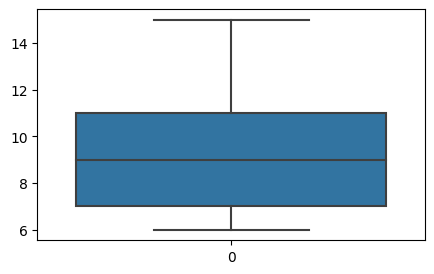

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Age'])
plt.show()

## Exploratory Data Analysis ( EDA )

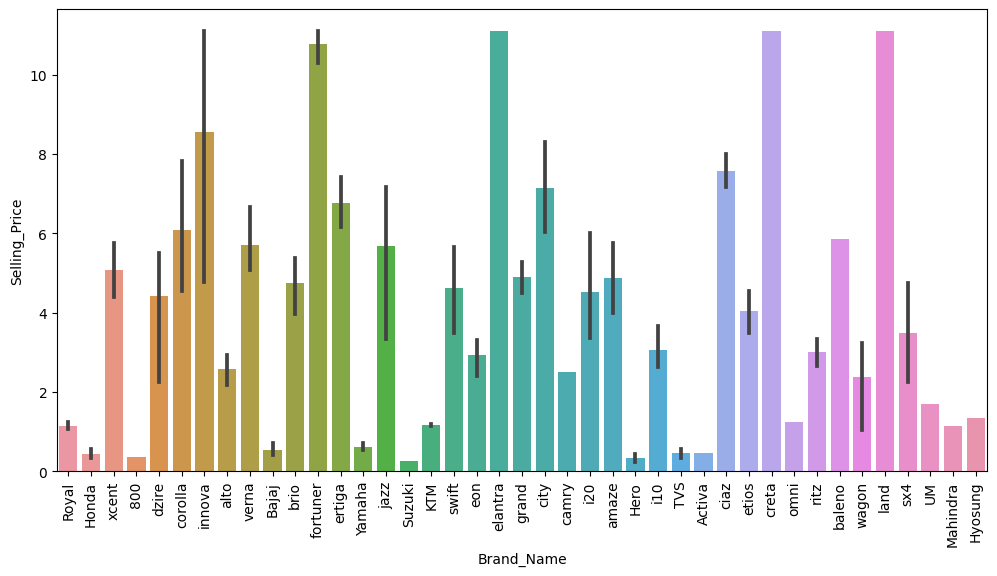

In [29]:
# the variation of selling price based on brand
plt.figure(figsize=(12,6))
sns.barplot(x="Brand_Name",y="Selling_Price",data=df)
plt.xticks(rotation = 90)
plt.show()

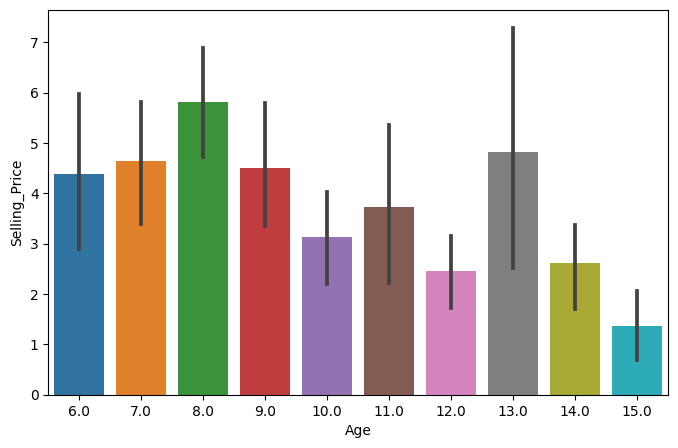

In [30]:
# The variation of selling price based on age
plt.figure(figsize=(8,5))
sns.barplot(x="Age",y="Selling_Price",data=df)
plt.show()

Fuel_Type
Petrol    165
Diesel     44
CNG         1
Name: count, dtype: int64


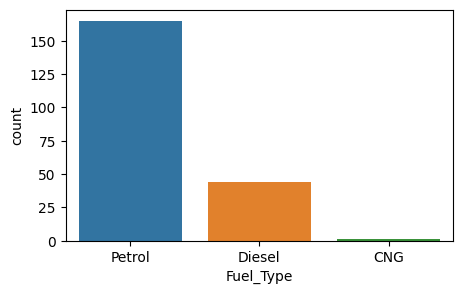

In [31]:
# The count difference between the Petrol, Diesel, CNG
print(df["Fuel_Type"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Fuel_Type",data=df)
plt.show()

Seller_Type
Dealer        137
Individual     73
Name: count, dtype: int64


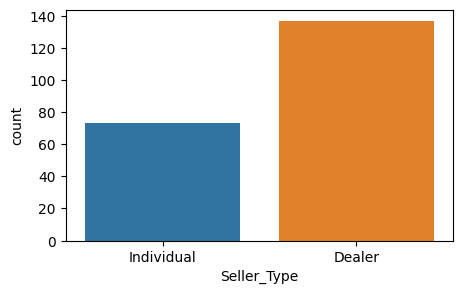

In [32]:
# How many are Individual and Dealer cars?
print(df["Seller_Type"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Seller_Type",data=df)
plt.show()

Transmission
Manual       180
Automatic     30
Name: count, dtype: int64


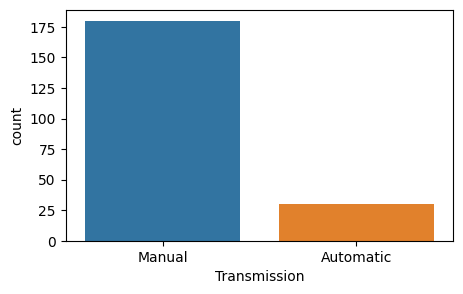

In [33]:
# How many are automatic and manual cars?
print(df["Transmission"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Transmission",data=df)
plt.show()

## Feature Engineering

In [34]:
# Target and labels

x=df.drop('Selling_Price',axis=1).copy()
y=df['Selling_Price'].copy()


## Train Test Split

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.7,random_state=123)

In [36]:
x_train.shape

(147, 7)

In [37]:
x_test.shape

(63, 7)

In [38]:
# Save train and test data
x_train.to_csv('Data/Train/Evaluate/Raw/x_train.csv',index=False)
y_train.to_csv('Data/Train/Evaluate/Raw/y_train.csv',index=False)

x_test.to_csv('Data/Test/Evaluate/Raw/x_test.csv',index=False)
y_test.to_csv('Data/Test/Evaluate/Raw/y_test.csv',index=False)

## Feature Encoding

In [39]:
# x_encoder
encoder=OrdinalEncoder()
x_encode=encoder.fit(x_train)
jb.dump(x_encode,'Data/Train/Model/train_encode_model.pkl')
x_encode=encoder.transform(x_train)
x_train_encode=pd.DataFrame(x_encode,columns=x_train.columns)
x_train_encode

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Brand_Name,Age
0,79.0,90.0,2.0,0.0,1.0,18.0,5.0
1,19.0,14.0,2.0,1.0,1.0,7.0,1.0
2,48.0,105.0,1.0,0.0,1.0,24.0,3.0
3,42.0,55.0,2.0,0.0,1.0,26.0,2.0
4,45.0,12.0,2.0,0.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...
142,18.0,30.0,2.0,1.0,1.0,2.0,5.0
143,18.0,80.0,2.0,1.0,1.0,2.0,4.0
144,1.0,59.0,2.0,1.0,1.0,4.0,4.0
145,60.0,75.0,1.0,0.0,1.0,16.0,2.0


In [40]:
# y_train_encoder
encoder=LabelEncoder()
y_encode=encoder.fit(y_train)
jb.dump(y_encode,'Data/Train/Model/y_train_encode_model.pkl')
y_encode=encoder.transform(y_train)
y_train_encode=pd.DataFrame(y_encode)
y_train_encode

,0
0,67
1,19
2,48
3,51
4,63
...,...
142,8
143,10
144,3
145,76


In [41]:
# x_encoder
encoder=OrdinalEncoder()
x_test_encode=encoder.fit(x_test)
jb.dump(x_test_encode,'Data/Test/Model/x_test_encode_model.pkl')
x_encode=encoder.transform(x_test)
x_test_encode=pd.DataFrame(x_encode,columns=x_test.columns)

In [42]:
x_test_encode

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Brand_Name,Age
0,5.0,14.0,1.0,1.0,1.0,1.0,3.0
1,44.0,55.0,1.0,0.0,1.0,12.0,4.0
2,45.0,47.0,0.0,0.0,1.0,17.0,7.0
3,42.0,37.0,1.0,0.0,1.0,11.0,2.0
4,33.0,3.0,1.0,0.0,1.0,20.0,0.0
...,...,...,...,...,...,...,...
58,6.0,19.0,1.0,1.0,1.0,7.0,5.0
59,20.0,20.0,0.0,0.0,1.0,18.0,2.0
60,3.0,24.0,1.0,1.0,1.0,0.0,5.0
61,4.0,1.0,1.0,1.0,0.0,6.0,9.0


In [43]:
# y_test_encoder
encoder=LabelEncoder()
y_encode=encoder.fit(y_test)
jb.dump(y_encode,'Data/Test/Model/y_test_encode_model.pkl')
y_encode=encoder.transform(y_test)
y_test_encode=pd.DataFrame(y_encode)
y_test_encode

,0
0,7
1,32
2,47
3,44
4,42
...,...
58,8
59,27
60,1
61,2


In [44]:
x_train_encode.to_csv('Data/Train/Processed/x_train_encode.csv',index=False)
y_train_encode.to_csv('Data/Train/Processed/y_train.csv',index=False)

x_test_encode.to_csv('Data/Test/Processed/x_test_processed.csv',index=False)
y_test_encode.to_csv('Data/Test/Processed/y_test_processed.csv',index=False)

<Axes: >

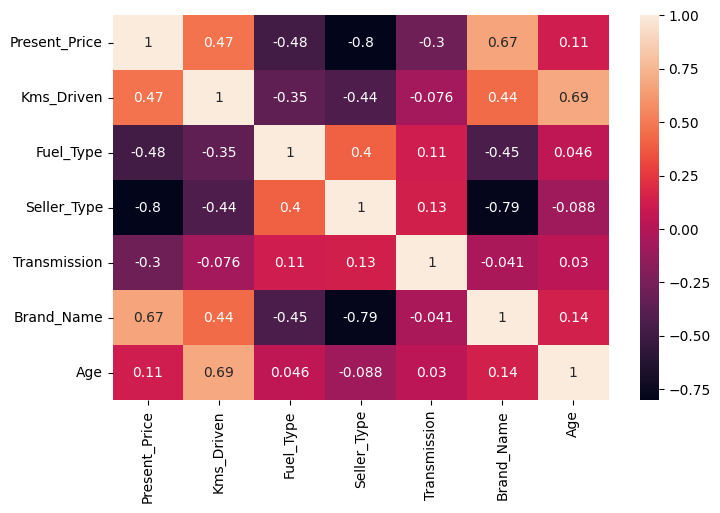

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(x_train_encode.corr(),annot=True)

## Feature selection

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(x_train_encode,y_train_encode)

In [47]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs        Score
0  Present_Price  2135.381402
1     Kms_Driven  1909.586501
5     Brand_Name   881.739057
6            Age   208.539352
3    Seller_Type    89.007547
2      Fuel_Type    13.003167
4   Transmission    12.585176


In [48]:
feature=featureScores.nlargest(10,'Score')
feature

,Specs,Score
0,Present_Price,2135.381402
1,Kms_Driven,1909.586501
5,Brand_Name,881.739057
6,Age,208.539352
3,Seller_Type,89.007547
2,Fuel_Type,13.003167
4,Transmission,12.585176


In [49]:
feature_list=feature['Specs'].to_list()
feature_list

['Present_Price',
 'Kms_Driven',
 'Brand_Name',
 'Age',
 'Seller_Type',
 'Fuel_Type',
 'Transmission']

In [50]:
import joblib as jb
jb.dump(feature_list,'Data/Train/Model/featureselected_model.pkl')

['Data/Train/Model/featureselected_model.pkl']

In [51]:
featuer_selected=x_train_encode[feature_list]
featuer_selected

,Present_Price,Kms_Driven,Brand_Name,Age,Seller_Type,Fuel_Type,Transmission
0,79.0,90.0,18.0,5.0,0.0,2.0,1.0
1,19.0,14.0,7.0,1.0,1.0,2.0,1.0
2,48.0,105.0,24.0,3.0,0.0,1.0,1.0
3,42.0,55.0,26.0,2.0,0.0,2.0,1.0
4,45.0,12.0,14.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...
142,18.0,30.0,2.0,5.0,1.0,2.0,1.0
143,18.0,80.0,2.0,4.0,1.0,2.0,1.0
144,1.0,59.0,4.0,4.0,1.0,2.0,1.0
145,60.0,75.0,16.0,2.0,0.0,1.0,1.0


In [52]:
featuer_selected.to_csv('Data/Train/Processed/featureSelected_X_train_encode.csv',index=False)

## Model Training

In [53]:
model=LinearRegression()
model.fit(featuer_selected,y_train_encode)
print('Model score :',model.score(featuer_selected,y_train_encode)*100)

Model score : 93.61962350393168


In [54]:
jb.dump(model,'Data/Train/model/lor.pkl')

['Data/Train/model/lor.pkl']

## Prediction

In [55]:
Feature_selection =jb.load('Data/Train/Model/featureselected_model.pkl')
encode_model =jb.load('Data/Train/Model/train_encode_model.pkl')
model=jb.load('Data/Train/model/lor.pkl')

In [56]:
featuer_selected_1=x_test_encode[Feature_selection]
featuer_selected_1

,Present_Price,Kms_Driven,Brand_Name,Age,Seller_Type,Fuel_Type,Transmission
0,5.0,14.0,1.0,3.0,1.0,1.0,1.0
1,44.0,55.0,12.0,4.0,0.0,1.0,1.0
2,45.0,47.0,17.0,7.0,0.0,0.0,1.0
3,42.0,37.0,11.0,2.0,0.0,1.0,1.0
4,33.0,3.0,20.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
58,6.0,19.0,7.0,5.0,1.0,1.0,1.0
59,20.0,20.0,18.0,2.0,0.0,0.0,1.0
60,3.0,24.0,0.0,5.0,1.0,1.0,1.0
61,4.0,1.0,6.0,9.0,1.0,1.0,0.0


In [57]:
y_pred=pd.DataFrame(model.predict(featuer_selected_1))

In [58]:
y_pred

,0
0,8.929948
1,47.551497
2,42.457513
3,52.908727
4,52.888749
...,...
58,2.995345
59,39.327726
60,0.432245
61,-12.887181


In [59]:
print('Mean Absolute Error:',mean_absolute_error(y_pred,y_test_encode))
print('Mean Squared Error :',mean_squared_error(y_pred,y_test_encode))
print('Root Mean Squared Error :',sqrt(mean_squared_error(y_pred,y_test_encode)))

Mean Absolute Error: 9.528335055116013
Mean Squared Error : 115.30200134985378
Root Mean Squared Error : 10.73787694797504


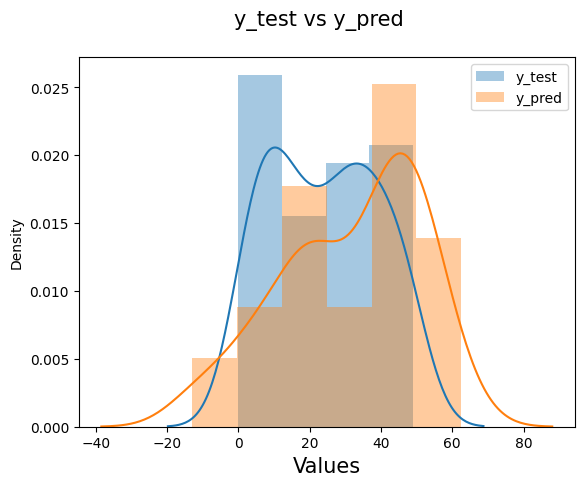

In [60]:
fig = plt.figure()
sns.distplot(y_test_encode, label='y_test')
sns.distplot(y_pred, label='y_pred')
fig.suptitle('y_test vs y_pred', fontsize=15)  # Plot heading 
plt.xlabel('Values', fontsize=15)  # X-label
plt.legend()
plt.show()
